# 机器学习入门之线性回归
你所在的公司在电视上做产品广告, 收集到了电视广告投入x(以百万为单位)与产品销售量y(以亿为单位)的数据. 你作为公司的数据科学家, 希望通过分析这些数据, 了解电视广告投入x(以百万为单位)与产品销售量y的关系. 

假设x与y的之间的关系是线性的, 也就是说 y = ax + b. 通过线性回归(Linear Regression), 我们就可以得知 a 和 b 的值. 于是我们在未来做规划的时候, 通过电视广告投入x, 就可以预测产品销售量y, 从而可以提前做好生产和物流, 仓储的规划. 为客户提供更好的服务.

#课后练习#
气温会随着海拔高度的升高而降低, 我们可以通过测量不同海拔高度的气温来预测海拔高度和气温的关系. 
我们假设海拔高度和气温的关系可以使用如下公式表达:
y(气温) = a * x(海拔高度) + b 
理论上来讲, 确定以上公式 a 和 b的值只需在两个不同高度测试, 就可以算出来 a 和 b 的值了. 但是由于所有的设备都是有误差的, 而使用更多的高度测试的值可以使得预测的值更加准确. 
我们提供了在9个不同高度测量的气温值, 请你根据今天学习的线性回归方法预测 a 和 b 的值. 根据这个公式, 我们预测一下在8000米的海拔, 气温会是多少?
数据文件请见demodata/height.vs.temperature.csv



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv("demodata/height.vs.temperature.csv")

In [3]:
data.head()

height  temperature
0     0.0    12.834044
1   500.0    10.190649
2  1000.0     5.500229
3  1500.0     2.854665
4  2000.0    -0.706488

In [5]:
data.columns

Index(['height', 'temperature'], dtype='object')

## 通过数据可视化分析数据

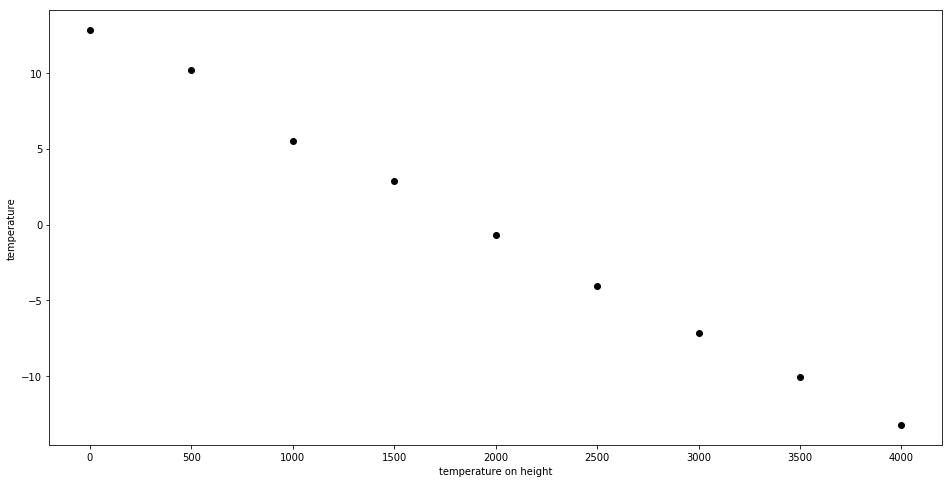

In [7]:
plt.figure(figsize=(16, 8))
plt.scatter(data['height'], data['temperature'], c ='black')
plt.xlabel("temperature on height")
plt.ylabel("temperature")
plt.show()

## 训练线性回归模型

In [8]:
X = data['height'].values.reshape(-1,1)
y = data['temperature'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
print('a = {:.5}'.format(reg.coef_[0][0]))
print('b = {:.5}'.format(reg.intercept_[0]))

print("线性模型为: Y = {:.5}X + {:.5} ".format(reg.coef_[0][0], reg.intercept_[0]))

a = -0.0065695
b = 12.719
线性模型为: Y = -0.0065695X + 12.719 


## 可视化训练好的线性回归模型

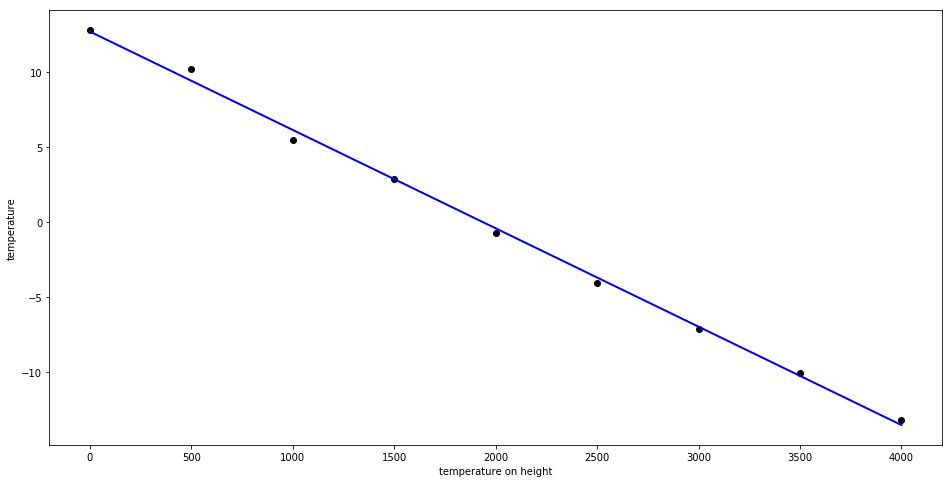

In [10]:
predictions = reg.predict(X)

plt.figure(figsize=(16, 8))
plt.scatter(data['height'], data['temperature'], c ='black')
plt.plot(data['height'], predictions,c ='blue', linewidth=2)
plt.xlabel("temperature on height")
plt.ylabel("temperature")
plt.show()

In [ ]:
# 做预测
我们预测一下在8000米的海拔, 气温会是多少？

In [12]:
predictions = reg.predict([[8000]])
print('8000米的海拔, 气温是{:.5}摄氏度'.format( predictions[0][0]) )

8000米的海拔, 气温是-39.838亿
